<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day3/08_ggplot2/2023-02-01-Lesson19.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# ref

<https://guebin.github.io/DV2022/posts/2022-11-07-10wk-1.html#barplot>

<https://guebin.github.io/DV2022/posts/2022-11-09-10wk-2.html#심슨의-역설>

# imports

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

# barplot 

In [835]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2021/master/_notebooks/2021-10-25-FIFA22_official_data.csv')\
.query('Nationality=="Korea Republic" or Nationality=="Japan"')\
[['Nationality','Overall','Age']].reset_index(drop=True)
df

,Nationality,Overall,Age
0,Korea Republic,89,28
1,Japan,77,28
2,Japan,73,28
3,Korea Republic,72,31
4,Japan,71,28
...,...,...,...
456,Japan,59,21
457,Korea Republic,60,21
458,Japan,54,17
459,Korea Republic,51,20


## geom_col

`-` 예시1: 한국과 일본의 평균능력치 비교

In [765]:
data=df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


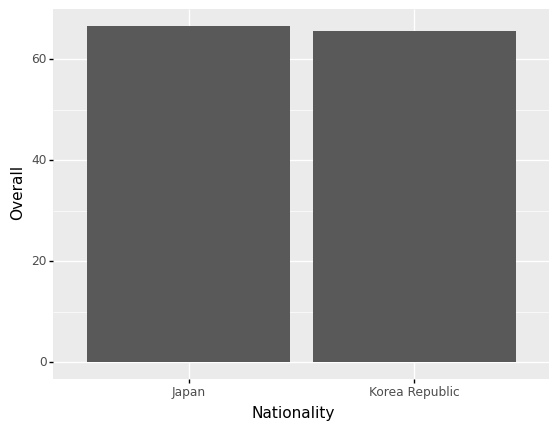

<ggplot: (8739001076625)>

In [766]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall'))

`-` 예시2: 한국과 일본의 평균능력치 비교 (색상변경) 

In [767]:
data=df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


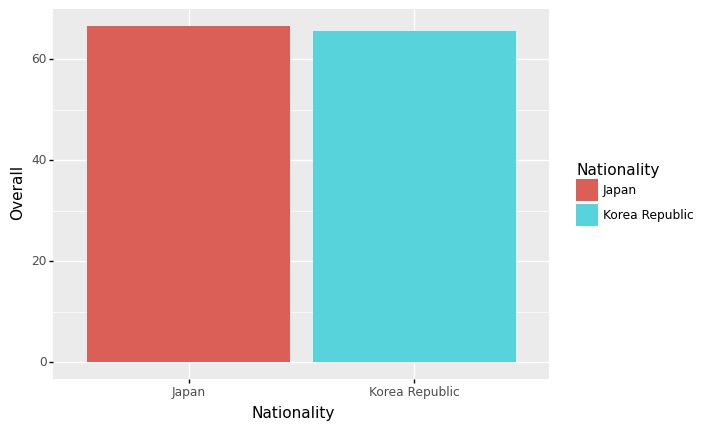

<ggplot: (8739001430581)>

In [769]:
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))
#ggplot(data)+geom_col(aes(x='Nationality',y='Overall',color='Nationality'))

`-` 예시3: 한국과 일본의 평균연령 비교

In [770]:
data=df.groupby('Nationality').agg({'Age':np.mean}).reset_index()
data

,Nationality,Age
0,Japan,26.084507
1,Korea Republic,27.158192


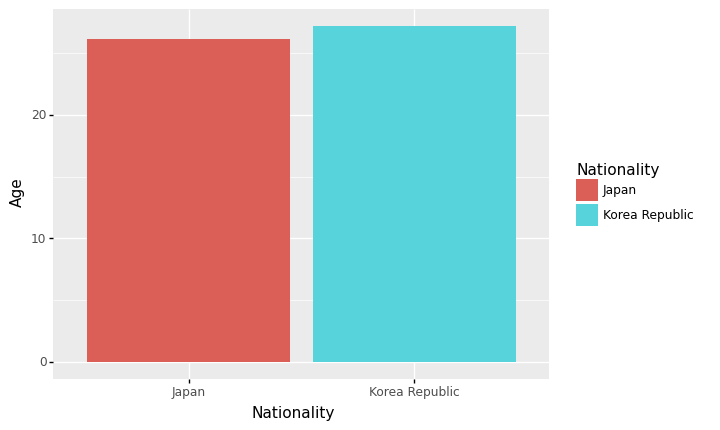

<ggplot: (8739000939717)>

In [772]:
ggplot(data)+geom_col(aes(x='Nationality',y='Age',fill='Nationality'))

## geom_col + position='dodge'

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교

In [786]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


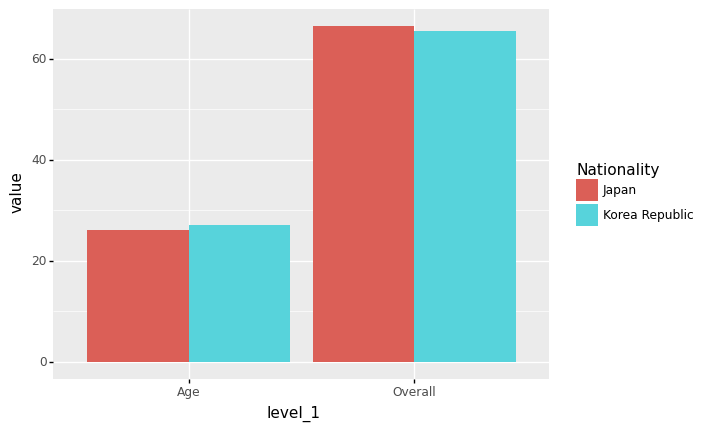

<ggplot: (8739004389489)>

In [788]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')

## geom_col + coord_flip()

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (90도회전)

In [789]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


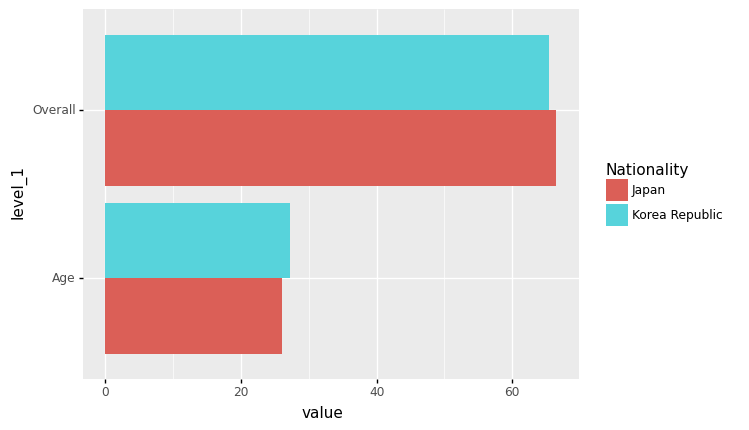

<ggplot: (8739001299161)>

In [790]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+coord_flip()

## geom_col + facet_wrap(var)

`-` 예시1: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [791]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


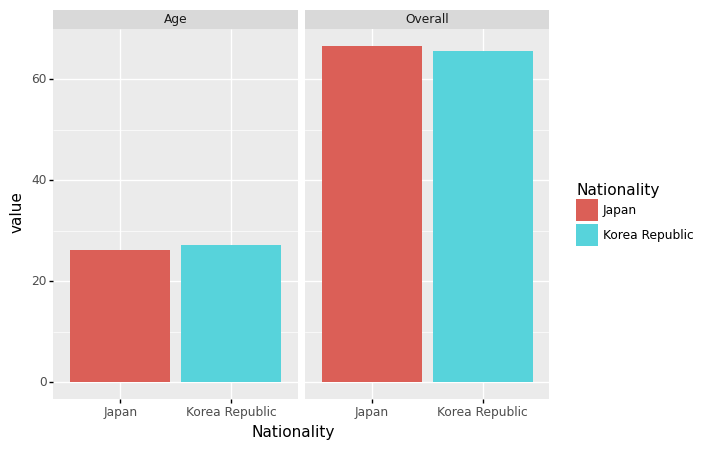

<ggplot: (8739001171105)>

In [795]:
ggplot(data)+geom_col(aes(x='Nationality',fill='Nationality',y='value'),position='dodge')\
+facet_wrap('level_1')

`-` 예시2: 한국과 일본의 평균연령+평균능력치 비교 (면분할)

In [796]:
data=df.groupby('Nationality').agg({'Overall':np.mean,'Age':np.mean})\
.stack().reset_index().rename({0:'value'},axis=1)
data

,Nationality,level_1,value
0,Japan,Overall,66.478873
1,Japan,Age,26.084507
2,Korea Republic,Overall,65.457627
3,Korea Republic,Age,27.158192


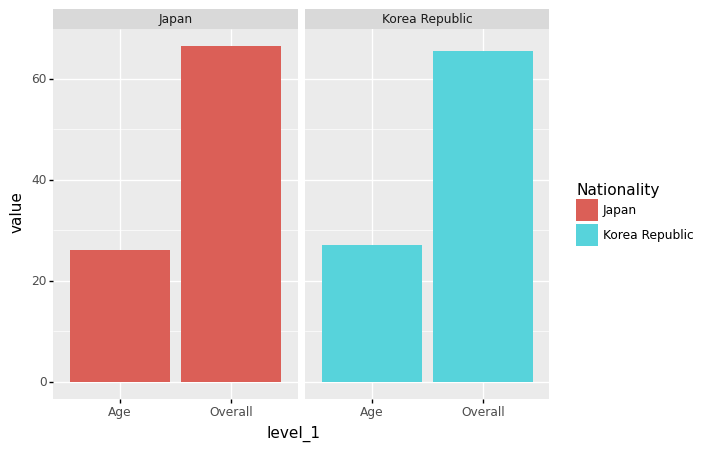

<ggplot: (8739005005861)>

In [797]:
ggplot(data)+geom_col(aes(x='level_1',fill='Nationality',y='value'),position='dodge')\
+facet_wrap('Nationality')

## geom_col + facet_grid('var_y ~ var_x')

`-` 예시1: 한국과 일본의 평균연령+평균능력치+최대능력치 비교 (면분할)

In [808]:
data=df.groupby('Nationality').agg({'Overall':[np.mean,np.max],'Age':np.mean})\
.melt(ignore_index=False).reset_index()
data

,Nationality,variable_0,variable_1,value
0,Japan,Overall,mean,66.478873
1,Korea Republic,Overall,mean,65.457627
2,Japan,Overall,amax,79.000000
3,Korea Republic,Overall,amax,89.000000
4,Japan,Age,mean,26.084507
5,Korea Republic,Age,mean,27.158192


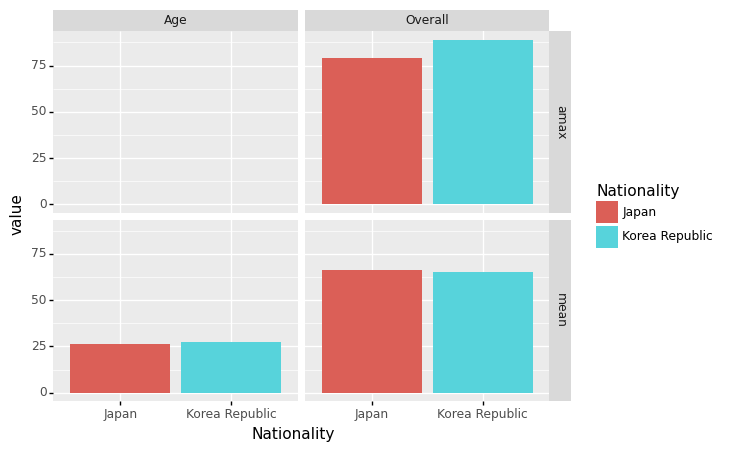

<ggplot: (8739001454385)>

In [811]:
ggplot(data)+geom_col(aes(fill='Nationality',x='Nationality',y='value'),position='dodge')\
+facet_grid('variable_1~variable_0')

## geom_bar vs geom_col

`-` 예시1: 한국과 일본의 단순 선수 숫자 비교 (with goem_col)

In [820]:
data=df.groupby('Nationality').agg({'Age':'count'}).reset_index().rename({'Age':'count'},axis=1)
data

,Nationality,count
0,Japan,284
1,Korea Republic,177


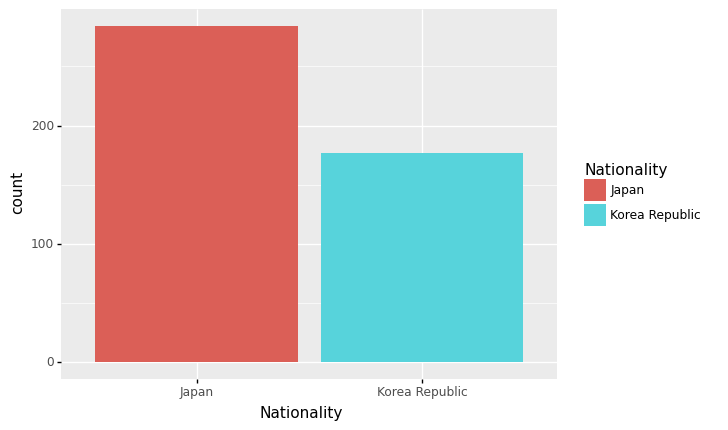

<ggplot: (8739001309845)>

In [821]:
ggplot(data)+geom_col(aes(x='Nationality',fill='Nationality',y='count'))

`-` 예시2: 한국과 일본의 단순 선수 숫자 비교 (with goem_bar)

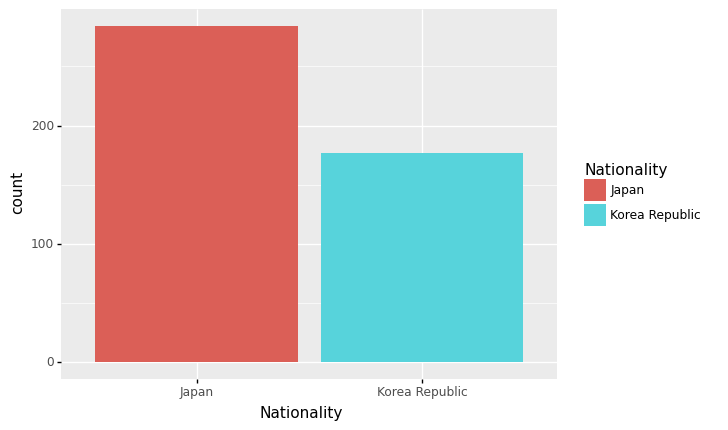

<ggplot: (8739003315533)>

In [823]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'))

- 특징1: 원래 데이터프레임 그대로 하는게 아니라 뭔가 변형된 값이 출력 (정확하게는 groupby + count가 변형요소) 
- 특징2: y는 당연히 count이므로 y를 명시할 필요가 없음. (잘 생각해보면 명시하고 싶어도 명시할 수 없음, y는 groupby + count 에 의해서 계산된 값이고 df자체에는 존재하지 않음) 

`-` 이렇게 약속된 변형은 `stat='count'` 옵션 때문에 가능함 

- stat='count'는 그룹바이이후에 count를 하라는 의미

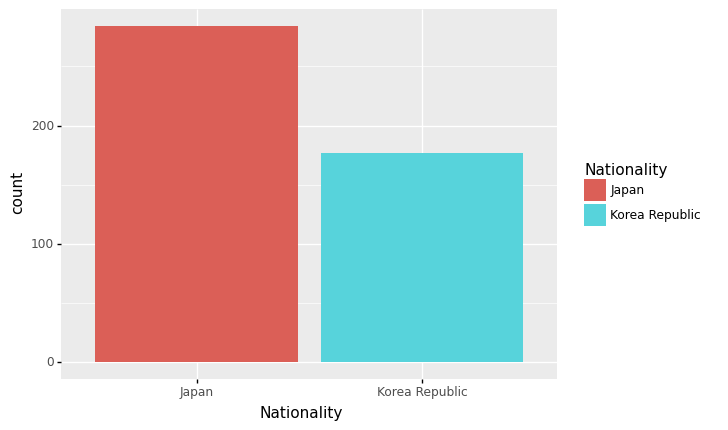

<ggplot: (8739005443049)>

In [836]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='count')

`-` `stat='identity'` 로 옵션을 바꾸면 약속된 변환이 수행되지 않음 

- stat='identity'는 아무 변환도 하지말라는 의미

In [837]:
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='identity')

KeyError: 'y'

- 에러가난다. 

(참고) 사실 아래의 3개의 코드가 모두 같다. <-- 수업시간에 설명 X

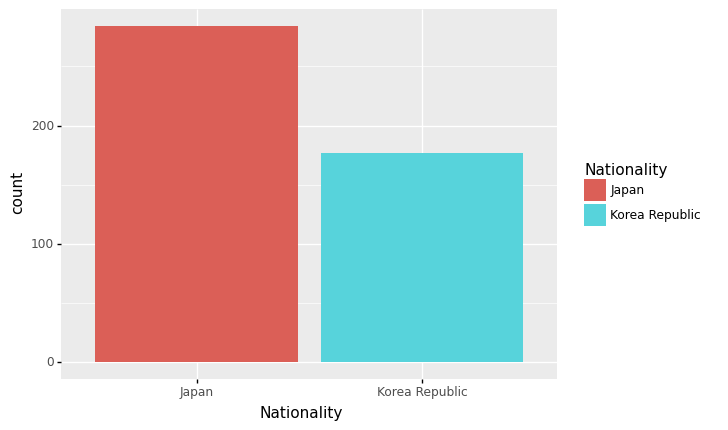

<ggplot: (8739004080929)>

In [839]:
ggplot(df)+geom_bar(aes(x='Nationality',y='..count..',fill='Nationality'),stat='count')
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality'),stat='count') # y='..count..' 생략,
ggplot(df)+geom_bar(aes(x='Nationality',fill='Nationality')) # y='..count..' 생략, stat='count' 생략

## geom_bar()의 불편한점 

`-` 사실 편하라고 만든것 같은데, 그닥 편하지 않음. 

- 편하라고 만든 점1: groupby를 자동으로 해줘서 groupby를 못하는 유저들이 사용하기 편리하게 함 -> 그런데 우리는 groupby 잘함
- 편하라고 만든 점2: groupby이후 count연산을 알아서 해줌 -> 그런데 count연산만 알아서해주고 그 이외의 연산은 잘 지원안됨 

`-` 결론: groupby + count 조합에서만 편리하고 나머지는 편하지 않다. 

`-` 불편한 예시: 나라별 overall의 평균을 geom_bar()로 플랏해보라. 

In [827]:
data= df.groupby('Nationality').agg({'Overall':np.mean}).reset_index()
data

,Nationality,Overall
0,Japan,66.478873
1,Korea Republic,65.457627


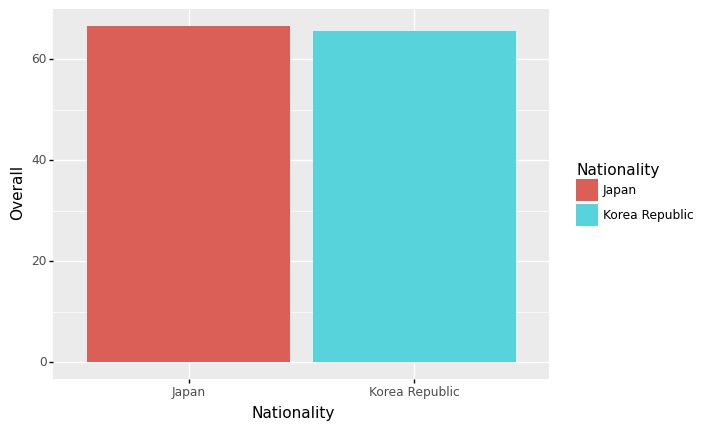

<ggplot: (8738999896737)>

In [833]:
ggplot(data)+geom_bar(aes(x='Nationality',y='Overall',fill='Nationality'),stat='identity')
ggplot(data)+geom_col(aes(x='Nationality',y='Overall',fill='Nationality'))

# 심슨의 역설

`-` 버클리대학교의 입학데이터

- <https://github.com/guebin/DV2022/blob/master/_notebooks/ds.pdf>

`-` 주장: 버클리대학에 gender bias가 존재한다. 

- 1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬 많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다. 

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

,department,result,gender,count
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


## 시각화1: 전체합격률

`-` df1 

In [4]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()

,gender,result,count
0,female,fail,1063
1,female,pass,772
2,male,fail,1291
3,male,pass,1400


`-` df2 

In [5]:
df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,gender,count2
0,female,1835
1,male,2691


`-` merge: 두개의 데이터프레임을 합친다

In [6]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))

,gender,result,count,count2
0,female,fail,1063,1835
1,female,pass,772,1835
2,male,fail,1291,2691
3,male,pass,1400,2691


`-` 비율계산

In [7]:
df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

,gender,result,count,count2,rate
0,female,fail,1063,1835,0.579292
1,female,pass,772,1835,0.420708
2,male,fail,1291,2691,0.479747
3,male,pass,1400,2691,0.520253


`-` 시각화

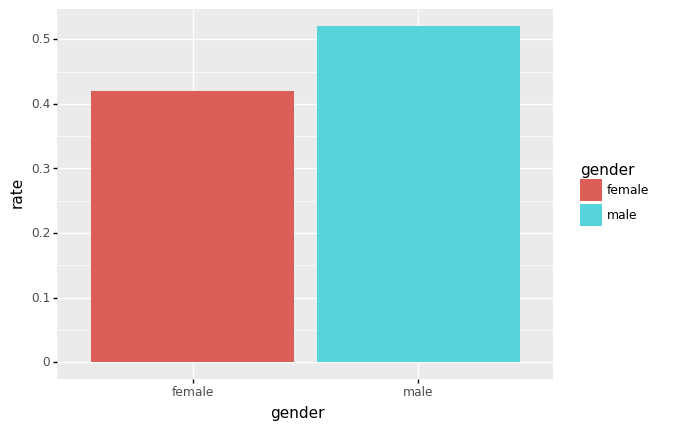

<ggplot: (8789343060161)>

In [8]:
data1= df.groupby(['gender','result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(data1.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))

`-` 결론: 남자의 합격률이 더 높다. $\to$ 성차별이 있어보인다(?)

## 시각화2: 학과별 합격률

`-` df2

In [9]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,department,gender,count2
0,A,female,108
1,A,male,825
2,B,female,25
3,B,male,560
4,C,female,593
5,C,male,325
6,D,female,375
7,D,male,417
8,E,female,393
9,E,male,191


`-` merge

In [10]:
df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

,department,result,gender,count,count2,rate
0,A,fail,female,19,108,0.175926
1,A,pass,female,89,108,0.824074
2,A,fail,male,314,825,0.380606
3,A,pass,male,511,825,0.619394
4,B,fail,female,7,25,0.280000
5,B,pass,female,18,25,0.720000
6,B,fail,male,208,560,0.371429
7,B,pass,male,352,560,0.628571
8,C,fail,female,391,593,0.659359
9,C,pass,female,202,593,0.340641


`-` 시각화 

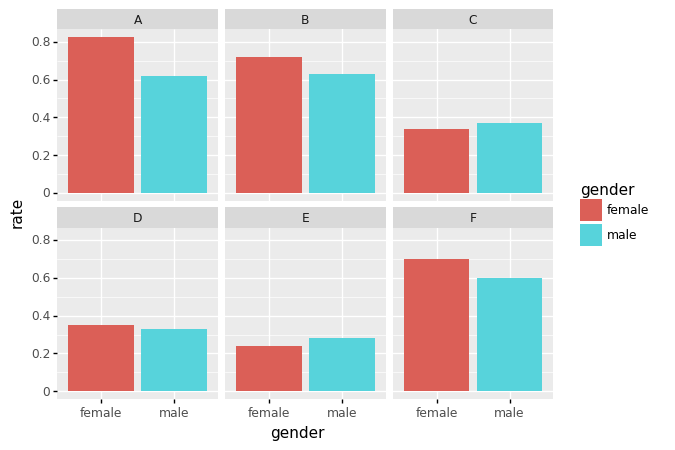

<ggplot: (8789343111249)>

In [11]:
data2=df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))\
+facet_wrap('department')

- 학과별로 살펴보니 오히려 A,B,F,D의 경우 여성의 합격률이 높다. 

`-` 교재에서 설명한 이유: 여성이 합격률이 낮은 학과에만 많이 지원하였기 때문 

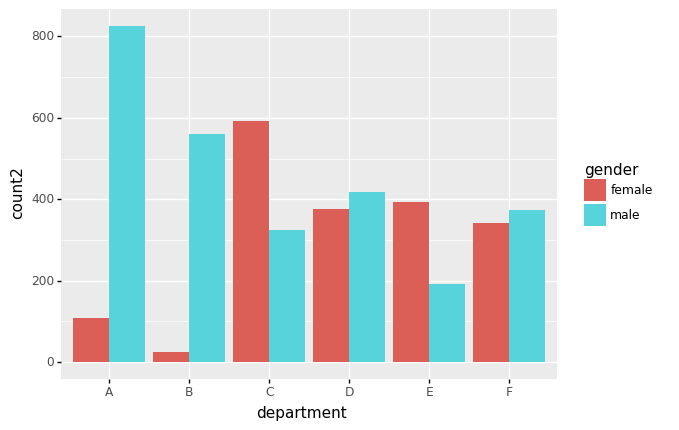

<ggplot: (8789343070225)>

In [12]:
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='department',y='count2',fill='gender'),position='dodge')

- 살펴보니 합격률이 높은 A,B학과의 경우 상대적으로 남성이 많이 지원하였음. 합격률이 낮은 C,D학과는 상대적으로 여성이 많이 지원함. D,F의 지원수는 비슷

# HW

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson2.csv")
df

,department,result,gender,count
0,A,fail,female,0
1,A,fail,male,100
2,A,pass,female,1
3,A,pass,male,900
4,B,fail,female,400
5,B,fail,male,1
6,B,pass,female,600
7,B,pass,male,1


`-` 시각화1: 남녀합격률시각화 

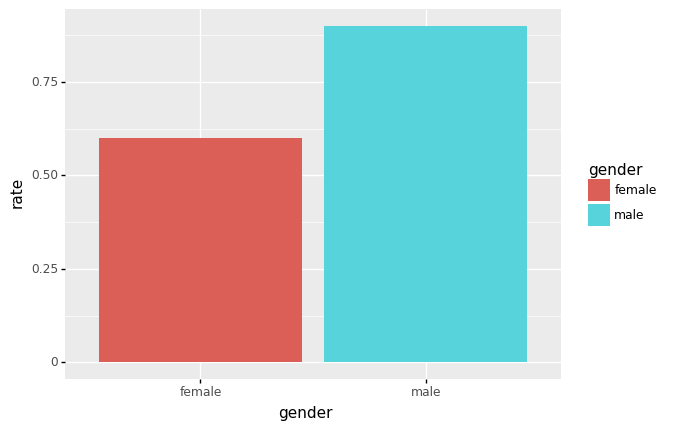

<ggplot: (8789342120725)>

In [20]:
# 시각화예시 

`-` 시각화2: 학과별 남녀합격률 시각화 

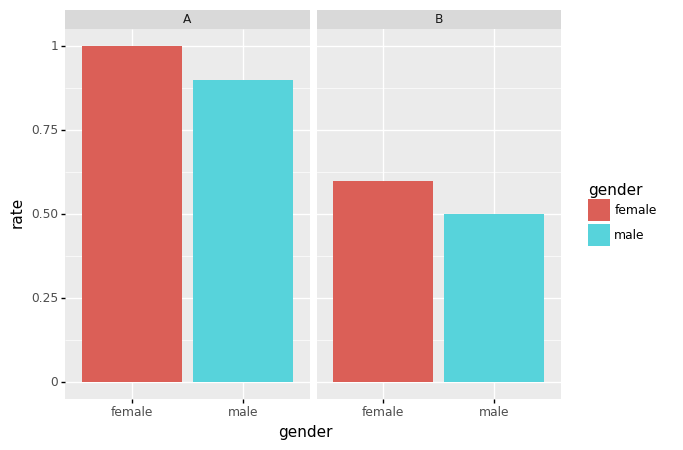

<ggplot: (8787281515073)>

In [330]:
# 시각화예시 

- A학과: 쓰면 거의 붙는 학과
- B학과: 쓰면 반정도 붙는 학과

`-` 시각화3: 학과별 지원자 수 시각화 

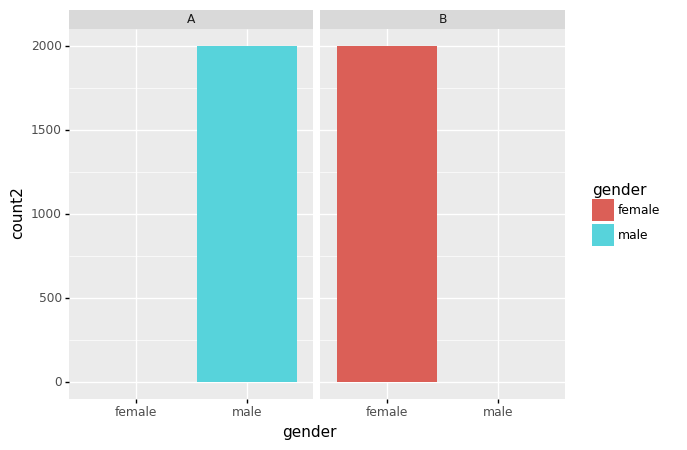

<ggplot: (8787281356149)>

In [332]:
# 시각화예시

- 여학생은 쓰면 붙는 A학과에는 거의 지원안함, 대신에 쓰면 반정도 붙는 B학과에 대부분 지원함 

# HW

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/HRDataset_v14.csv')
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


(1) 성별(Sex) 평균급여(Salary)를 구하고 아래의 지침에 따라 시각화 하라. 
- barplot으로 시각화
- 성별을 색깔과 x축으로 구분 
- 평균급여는 y축으로 구분 

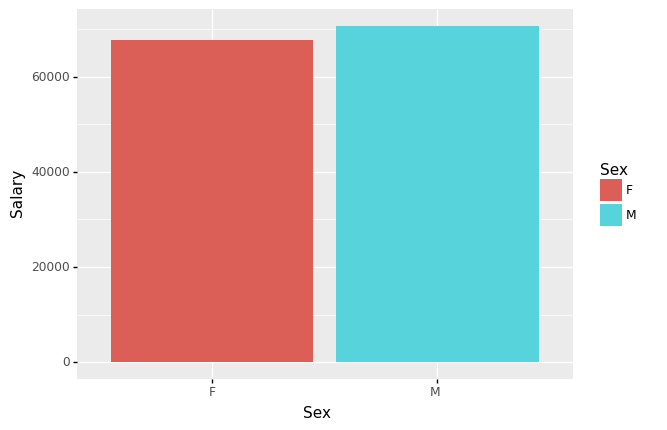

<ggplot: (8739012107149)>

In [849]:
# 시각화예시

(2) 성별(Sex)/인종별(RaceDesc) 평균급여(Salary)를 구하고 아래의 지침에 따라 시각화 하라. 

- barplot으로 시각화
- 인종은 면분할로 구분
- 성별은 x축과 색깔로 구분 
- 평균급여는 y축으로 구분 

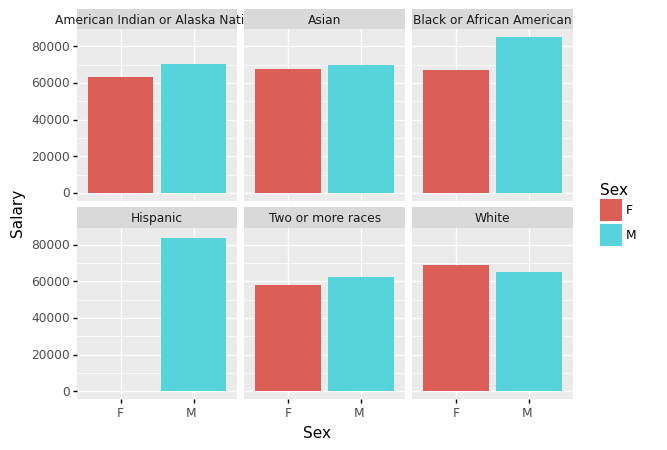

<ggplot: (8739000805601)>

In [885]:
# 시각화예시